<a href="https://colab.research.google.com/github/Piternicolas/Health-Insurance-AutoML/blob/main/Health_Insurance_Cost_Prediction_w_Auto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Auto Machine Learning Regression with Health Insurance Cost**
<p align="center"><img src="https://img.freepik.com/fotos-gratis/variedade-de-vista-frontal-de-elementos-de-natureza-morta-medica_23-2148854097.jpg?w=996&t=st=1689862889~exp=1689863489~hmac=936db0d6826737e26c192a545b3c1e7074f7b8aa8c840d3dcfaba739d85307e3" width="70%"></p>

### In this project I will show you predictions about health insurance cost, made using Auto Machine Learning `(PyCaret)`. PyCaret is a very usefull library that allow us to make a fast and efficient work with the data. As the name already says, I will predict the insurance cost and for that I will use a Regression Model.
* Bellow is the Dataset used in this work:
 * https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction?resource=download

* The health issue is so serious and so much times we don't give the enough attention, thinking from the business side it's necessary to have control of company's data and especially when we dealing with money, cost, we need to know if the data is correct like, the person cost, gender, age and etc, and the prediction part is a lot important point, taking this into account I will make prediction with a fast and efficient way but with a bigger attention.
* Bellow I will import the Dataset and annotate all the process and programation steps towards predictions.

In [ ]:
# Import the library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install pandas-profiling -q
from pandas_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.6 MB/s eta 0:00:00


<ipython-input-1-97fbf0340f2f>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
# Setting the DF visualization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('insurance.csv')
print('Dataset size:\n {} rows\n {}    cols'.format(df.shape[0], df.shape[1]))
df[:5]

Dataset size:
 1338 rows
 7    cols


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Above we can see a little about the dataset that I'm going to work.
---
## **Dicionary:**
* **age:** Customer's age.
* **sex:** Customer's gender.
* **bmi:** Body Mass Index.
* **children:** Customer's children.
* **smoker:** If the customer is smoker.
* **region:** Customer region.
* **charges:** The column name already say...
---
As I already said, I will use a fast and effective approach and visualize the dataset wouldn't be different.

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

The report above says a lot to us, I can highlight some.
* The dataset have **4 numeric columns**, **2 categorical columns** and **1 booleans columns.**
* The dataset don't have missing values.
* The **age** column varies between 18 and 64 years old and the mean is 39 years old.
* About the **sex** column, the data is balanced.
* The **bmi** column varies between 15 and 53.
* The **children** column varies between 0 and 5 kids.
* 79% of the **smoker** column is marked false.
* The **region** column is balanced.
* And the last column, **charges**, varies between 1121 and 63770.
* The Correlation Matrix shows that columns **charges** have positive correlation with **age** and **smoker**.

This report is very effective to get quick analyzes.

In [ ]:
# Viewing the columns types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

* The columns types are correct.
---
Now, as we already saw the dataset and some informations, we can go to the programation part, we will predict the column **`charges`**.

In [ ]:
# Import the necessary library
!pip install pycaret -q
import pycaret
from pycaret.regression import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.0 MB/s eta 0:0

In [ ]:
# Split de data in 3 parts, train, test and validation
test = df.sample(frac=0.1)
left = df.drop(test.index)

val = left.sample(frac=0.1)
train = left.drop(val.index)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)

# Seeing how the data is
print('train:\t',train.shape)
print('train:\t',test.shape)
print('val:\t',val.shape)

train:	 (1084, 7)
train:	 (134, 7)
val:	 (120, 7)


* Now I will set the setup.

In [ ]:
model = setup(data=df, target='charges',
              outliers_threshold=0.5,
              normalize=True,
              transformation=True,
              #transform_target=True
              )

,Description,Value
0,Session id,5989
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


* Above I passed some **preprocessing** parameters.
---
* Bellow I'll use the code to find the best model.

In [ ]:
all_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2655.9947,21923109.2758,4587.1780,0.8465,0.4433,0.3222,0.4750
lightgbm,Light Gradient Boosting Machine,2936.4047,24489730.1294,4869.2136,0.8275,0.5318,0.3710,0.7240
rf,Random Forest Regressor,2867.1195,24910024.9356,4927.2366,0.8233,0.4869,0.3589,0.8590
xgboost,Extreme Gradient Boosting,3054.4621,26926672.2000,5140.6306,0.8093,0.5487,0.3777,0.3330
et,Extra Trees Regressor,2822.2441,28057506.4272,5244.5898,0.7999,0.4921,0.3362,0.7420
ada,AdaBoost Regressor,4432.2863,29484984.6761,5373.4047,0.7898,0.6566,0.7974,0.4300
knn,K Neighbors Regressor,3499.5839,31629117.2000,5564.2038,0.7784,0.4974,0.3892,0.2000
ridge,Ridge Regression,4331.2234,39357326.4444,6216.7252,0.7239,0.5792,0.4348,0.7690
br,Bayesian Ridge,4334.0883,39357213.5099,6216.7584,0.7239,0.5796,0.4355,0.3970
llar,Lasso Least Angle Regression,4329.6385,39358192.4166,6216.7708,0.7238,0.5801,0.4344,0.2010


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
print(all_models)

GradientBoostingRegressor(random_state=5989)


* One of the best scores is **GradientBoostingRegressor (gbr)**, so I'll use it.

In [ ]:
# Creating the model
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2652.5026,21366610.5211,4622.4031,0.8471,0.3959,0.3076
1,2468.3537,20044168.8959,4477.0715,0.8675,0.3288,0.2227
2,3713.4509,43516211.0603,6596.6818,0.6855,0.5192,0.3756
3,2756.3659,21255317.8826,4610.3490,0.8209,0.4598,0.3231
4,2960.7596,25815639.8622,5080.9094,0.8527,0.4871,0.3439
5,3022.7476,31535579.9158,5615.6549,0.8099,0.5142,0.3089
6,2509.4294,16568364.2015,4070.4256,0.8613,0.4733,0.3845
7,2101.8975,13027546.4605,3609.3693,0.9086,0.4269,0.3352
8,2458.7752,15649796.0239,3955.9823,0.8999,0.4394,0.3119


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tuning the model
tuned_gbr = tune_model(gbr, optimize='MSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3082.6636,25635159.3676,5063.1176,0.8165,0.5567,0.4411
1,2862.0929,27359961.6318,5230.6751,0.8191,0.3611,0.2207
2,3739.1858,46833717.1359,6843.5164,0.6615,0.5687,0.4456
3,2664.0567,24578103.3544,4957.6308,0.7929,0.5565,0.2850
4,3383.5669,30401300.8108,5513.7375,0.8265,0.6045,0.4397
5,3630.7980,39653363.8808,6297.0917,0.7610,0.6526,0.4311
6,3219.3756,25971875.0878,5096.2609,0.7826,0.5559,0.5145
7,2643.0009,19266533.0469,4389.3659,0.8648,0.4764,0.3130
8,2786.9793,22408666.8854,4733.7793,0.8567,0.4679,0.3141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


* I used the **MSE** score to tuned the model, but it didn't make much difference, the tuned model with MSE score was a little lower than the first model but I'll continue with it.

In [ ]:
# Viewing the tuned model
print(tuned_gbr)

GradientBoostingRegressor(random_state=5989)


### **And bellow I'll show the plots of the model data.**

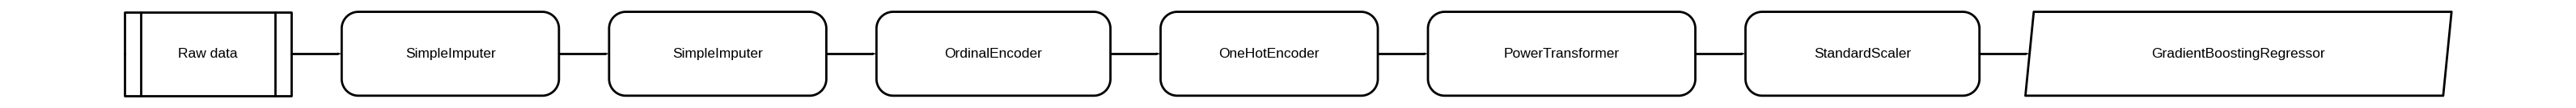

In [ ]:
# Showing the best line found
plot_model(tuned_gbr, plot='pipeline');

* Above shows the stages of the create model.

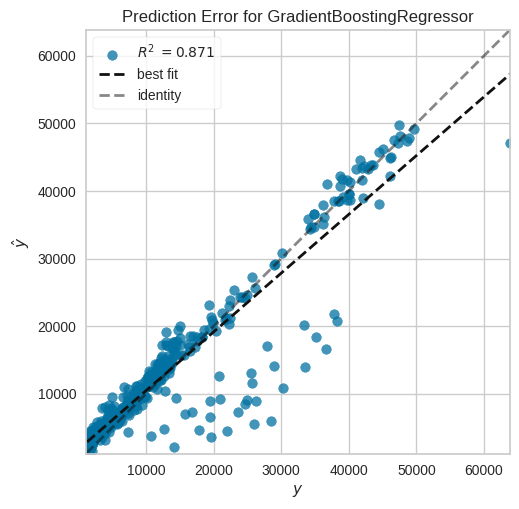

In [ ]:
# Showing the predict line
plot_model(tuned_gbr, plot='error')

* Above is the best line found.

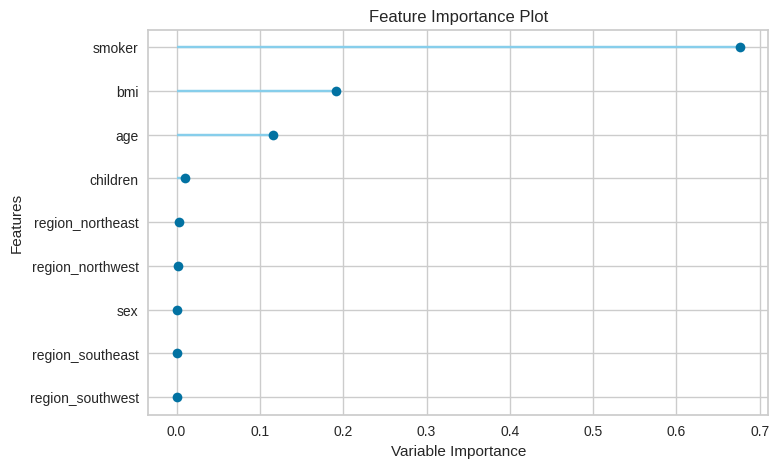

In [ ]:
# Showing the importance of the columns
plot_model(tuned_gbr, plot='feature')

* The plot above give us a very interesting information, the columns importances, which one have more relevance. We can see that the **Smoker** and **Age** column are the more relevance and affects the price in the **charges** column.

In [ ]:
# Evaluating the model
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

* Other way to show the plots is **evaluate_model**, it's show all plots available in once, just need to choose.
---
So now I'm going to make the predictions. But before I need to finalize the model.

In [ ]:
# Finalizing the model
final_gbr = finalize_model(tuned_gbr)

In [ ]:
# Predicting the gbr test data
pred_gbr = predict_model(final_gbr)
pred_gbr[:15]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2093.2165,15324918.7824,3914.7055,0.9003,0.3521,0.2494


,age,sex,bmi,children,smoker,region,charges,prediction_label
437,35,male,28.900000,3,no,southwest,5926.846191,6609.418100
179,41,female,33.154999,3,no,northeast,8538.288086,8890.986456
1159,32,female,41.099998,0,no,southwest,3989.841064,3547.293700
367,42,female,24.985001,2,no,northwest,8017.061035,8199.786018
625,29,female,26.030001,0,no,northwest,3736.464600,3992.469061
568,49,female,31.900000,5,no,southwest,11552.904297,10566.690657
3,33,male,22.705000,0,no,northwest,21984.470703,5686.393327
576,22,male,26.840000,0,no,southeast,1664.999634,2313.219032
278,59,male,31.790001,2,no,southeast,12928.791016,16215.705817
214,45,female,30.900000,2,no,southwest,8520.026367,9071.139345


* With the test data the scores were higher than the **tuned_gbr**. Let's see with the new data. In begin I separated the principal dataset in three, `train, test` and `val`, so now I'll use them.

In [ ]:
# TEST DATA NEW
test_pred = predict_model(final_gbr, data=test)
test_pred[:15]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2091.1364,16399283.8777,4049.6029,0.9049,0.3378,0.2353


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,62,female,32.965000,3,no,northwest,15612.193359,16739.300824
1,29,male,35.500000,2,yes,southwest,44585.457031,39775.535900
2,25,male,30.590000,0,no,northeast,2727.395020,4958.970298
3,25,male,23.900000,5,no,southwest,5080.096191,6204.811308
4,20,female,28.785000,0,no,northeast,2457.211182,3903.373432
5,58,female,32.395000,1,no,northeast,13019.161133,13235.715979
6,33,male,35.244999,0,no,northeast,12404.878906,7981.041526
7,47,male,19.190001,1,no,northeast,8627.541016,9308.884200
8,46,female,35.529999,0,yes,northeast,42111.664062,43652.414215
9,23,female,36.669998,2,yes,northeast,38511.628906,38835.072158


In [ ]:
# VAL DATA NEW
val_pred = predict_model(final_gbr, data=val)
val_pred[:15]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2293.2960,20180472.8739,4492.2681,0.8689,0.3676,0.2577


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,54,male,30.799999,1,yes,southeast,41999.519531,44491.009147
1,60,male,28.594999,0,no,northeast,30259.996094,14507.405770
2,60,female,38.060001,0,no,southeast,12648.703125,15131.597214
3,41,male,34.200001,2,no,northwest,7261.741211,8054.409877
4,19,female,24.510000,1,no,northwest,2709.111816,4270.839159
5,64,female,30.115000,3,no,northwest,16455.707031,16885.984460
6,62,female,36.860001,1,no,northeast,31620.001953,17504.953176
7,54,male,34.209999,2,yes,southeast,44260.750000,45013.817892
8,60,female,18.334999,0,no,northeast,13204.286133,13784.185780
9,59,male,24.700001,0,no,northeast,12323.935547,15139.506915


#### **Final scores**
* **Test MSE:** 16399283.8777
* **Val MSE:** 20180472.8739
* **Test R2:** 0.9049
* **Val R2:** 0.8689

In the end, the model scored well the new test and validation data, achivied good predictions in most of the data but I think if the dataset were bigger, the model will performance better.

---
### Now I'm going to create a database with informations from people that I know to predict. But we could also imagine a big company that receives a dataset like this containing 1000 new customers to check the cost of health insurance. **But, to us this is not a problem**, because we have a `Auto Machine Learning Regression` *model made in few minutes that can predict in a few seconds*.

In [ ]:
# Creating a new data
age = [24, 23, 52, 48, 26, 42, 46, 63, 78, 24, 28]
sex = ['male','female','male','female','female','female','male','female','female','male','male']
bmi = [26.12, 24.78, 28.4, 25.39, 31.89, 20.28,24.38, 33.44, 22.52, 19.24, 26.03]
children = [0,0,2,2,0,1,1,2,2,0,0]
smoker = ['no','no','no','yes','yes','no','no','no','no','yes','no']
region = ['southwest','southwest','southwest','southwest','southwest','southwest','southwest','southwest','southwest','southwest','southwest']

created_data = pd.DataFrame({'age':age, 'sex':sex, 'bmi':bmi,'children':children, 'smoker':smoker, 'region':region})

# Predicting
new_pred = predict_model(final_gbr, data=created_data)
new_pred

,age,sex,bmi,children,smoker,region,prediction_label
0,24,male,26.120001,0,no,southwest,3623.433674
1,23,female,24.780001,0,no,southwest,4538.234301
2,52,male,28.400000,2,no,southwest,12893.213089
3,48,female,25.389999,2,yes,southwest,23563.499751
4,26,female,31.889999,0,yes,southwest,35355.008190
5,42,female,20.280001,1,no,southwest,5652.996748
6,46,male,24.379999,1,no,southwest,8490.876051
7,63,female,33.439999,2,no,southwest,16571.904678
8,78,female,22.520000,2,no,southwest,18635.395849
9,24,male,19.240000,0,yes,southwest,15231.736999


---
# **FINAL WORDS**
* As I say above, we can do a fast and efficient model that give us good predictions and fix our problem in a few minutes, because our time is precious and we can't spend it.
* And if you like or this project help you, leave a comment in this post and follow me in social networks bellow.
 * **`Instagram:`** https://www.instagram.com/pit.nlima/
 * **`LinkedIn:`** https://www.linkedin.com/in/piternicolas/